In [11]:
import pandas as pd
import pickle
from scipy import stats
import pandas as pd
import seaborn as sns
from cliffs_delta import cliffs_delta

In [2]:
time1 = pickle.load(open( '../00_data/competency_development/competence_time_period_1.pkl','rb') )
time2 = pickle.load(open( '../00_data/competency_development/competence_time_period_2.pkl','rb') )
time1 = time1.rename(columns={"ability": "ability_t1"})
time2 = time2.rename(columns={"ability": "ability_t2"})
time2 = time2[['UserID','ability_t2']]

final = pd.merge(time1, time2, on='UserID',how='inner')
final['change'] = final.ability_t2-final.ability_t1

In [3]:
intvcontrol = final[(final['interventiongroup']=='control')]
intv2 = final[(final['interventiongroup']=='2')]
intv3 = final[(final['interventiongroup']=='3')]
intv4 = final[(final['interventiongroup']=='4')]
intv5 = final[(final['interventiongroup']=='5')]
intv6 = final[(final['interventiongroup']=='6')]


Check Mean and Median

In [4]:
ability_by_group = final.groupby(['interventiongroup']).agg({'ability_t1':'median','ability_t2':'median','change':'median','Geschlecht':'count'})
ability_by_group = ability_by_group.rename(columns={'Geschlecht':'count'})
ability_by_group

,ability_t1,ability_t2,change,count
interventiongroup,,,,
2,3.43323,3.964825,0.290495,456
3,2.72828,3.544150,0.457820,588
4,2.61939,4.028830,0.854480,676
5,2.76571,3.898770,0.974940,524
6,2.42349,3.883365,1.210350,520
control,3.02071,3.845850,0.368730,812


In [5]:
ability_by_group = final.groupby(['interventiongroup']).agg({'ability_t1':'mean','ability_t2':'mean','change':'mean','Geschlecht':'count'})
ability_by_group = ability_by_group.rename(columns={'Geschlecht':'count'})
ability_by_group

,ability_t1,ability_t2,change,count
interventiongroup,,,,
2,3.221242,3.439092,0.217849,456
3,2.833778,3.482728,0.648950,588
4,2.745159,3.638288,0.893130,676
5,2.605993,3.750456,1.144464,524
6,2.624220,3.661927,1.037707,520
control,3.062115,3.614208,0.552092,812


<AxesSubplot:xlabel='change', ylabel='interventiongroup'>

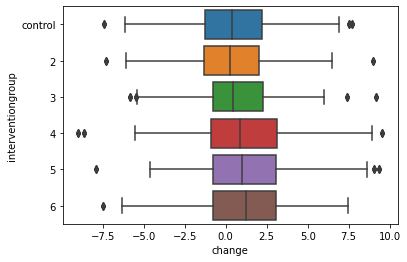

In [13]:
sns.boxplot(data=final, x="change", y="interventiongroup",showfliers = True, order=["control", "2",'3','4','5','6'])


Wilcoxon Mann Whitney Tests and Cliffs Delta (# thresholds: .11 (small), .28 (medium), .43 (large))

In [14]:
# control group
groups = [intv2, intv3, intv4, intv5, intv6]
for x in groups:
    print(stats.mannwhitneyu(intvcontrol['change'], x['change']))
    print(cliffs_delta(intvcontrol['change'], x['change'])[0])

MannwhitneyuResult(statistic=194720.0, pvalue=0.12563842235148148)
0.05176734940800277
MannwhitneyuResult(statistic=231024.0, pvalue=0.30216681789746913)
-0.0322710364934151
MannwhitneyuResult(statistic=252624.0, pvalue=0.008161554161628564)
-0.0795464482467135
MannwhitneyuResult(statistic=188096.0, pvalue=0.0003438876776589836)
-0.11585755649983079
MannwhitneyuResult(statistic=184464.0, pvalue=9.93782775001678e-05)
-0.12625994694960213


In [15]:
# Intv 2
groups = [intv3, intv4, intv5, intv6]
for x in groups:
    print(stats.mannwhitneyu(intv2['change'], x['change']))
    print(cliffs_delta(intv2['change'], x['change'])[0])

MannwhitneyuResult(statistic=122624.0, pvalue=0.017913618018982315)
-0.08533237856546128
MannwhitneyuResult(statistic=133936.0, pvalue=0.0001820160163227062)
-0.1310079933561715
MannwhitneyuResult(statistic=99712.0, pvalue=7.791946513947393e-06)
-0.16539440203562342
MannwhitneyuResult(statistic=98016.0, pvalue=2.9309919452806033e-06)
-0.17327935222672064


In [16]:
# Intv 3
groups = [intv4, intv5, intv6]
for x in groups:
    print(stats.mannwhitneyu(intv3['change'], x['change']))
    print(cliffs_delta(intv3['change'], x['change'])[0])

MannwhitneyuResult(statistic=188560.0, pvalue=0.11567375804773353)
-0.05124179849454575
MannwhitneyuResult(statistic=141056.0, pvalue=0.01502628550558008)
-0.08438489899776705
MannwhitneyuResult(statistic=137488.0, pvalue=0.003785988924198661)
-0.10068027210884353


In [17]:
# Intv 4
print(stats.mannwhitneyu(intv4['change'], intv5['change']))
print(cliffs_delta(intv4['change'], intv5['change'])[0])
print(stats.mannwhitneyu(intv4['change'], intv6['change']))
print(cliffs_delta(intv4['change'], intv6['change'])[0])

MannwhitneyuResult(statistic=171296.0, pvalue=0.32870849353518106)
-0.032837978228465604
MannwhitneyuResult(statistic=168560.0, pvalue=0.22404938303206123)
-0.040964952207555756


In [18]:
# Intv 5
print(stats.mannwhitneyu(intv5['change'], intv6['change']))
print(cliffs_delta(intv5['change'], intv6['change'])[0])

MannwhitneyuResult(statistic=135248.0, pvalue=0.8387089190033309)
-0.00728126834997064
